In [1]:
%pylab inline
from scipy.ndimage.filters import gaussian_filter

Populating the interactive namespace from numpy and matplotlib


## Converts Faster rcnn output to sort tracking format

In [25]:
dirt = "/Users/dwaithe/Documents/collaborators/WaitheD/Faster-RCNN-TensorFlow-Python3.5/data/demo/movie_frames/"
data2 = open("/Users/dwaithe/Documents/collaborators/WaitheD/tracking/sort/data/cells/data_cells.txt",'w')
for i in range(0,274):
    im_name ='C2-Faster-RCNN-TensorFlow-Python3.5-master-NUCLEOPHORE.ome%04d.txt'%i
    data1 = open(dirt+im_name,'r')
    while 1:
        line = data1.readline().split("\t")
        if not line or line ==['']:
            break
        stringout = str(i+1)+",-1,"+str(line[2])+","+str(line[3])+","
        stringout += str(float(line[4])-float(line[2]))+","+str(float(line[5].strip("\n"))-float(line[3]))
        stringout +=","+str(line[1])+","+"-1"+","+"-1"+","+"-1\n"
        data2.write(stringout)
    
            

In [24]:
line

['']

In [2]:
#Create playground
height = 2048#2048
width = 4096#8192
depth = 32#128
playground = np.zeros((height,width,depth))
coords = (np.array([height,width,depth])*np.random.random([80,3])).astype(np.int32)

In [4]:
#Randomly populate

#playground[coords[:,0],coords[:,1],coords[:,2]] = 1.0
sigx = sigy = 25.0
sigz = 10.0
kernel = np.zeros((int(sigy*6)+1,int(sigx*6)+1,int(sigz*6.)+1))
xcen = ycen = int(sigy*6)//2+1
zcen = int(sigz*6)//2+1
kernel[ycen,xcen,zcen] = 1.0
kernel = gaussian_filter(kernel, [sigy,sigx,sigz])
ker_wid = kernel.shape[0]//2
ker_hei = kernel.shape[1]//2
ker_sli = kernel.shape[2]//2

for [y,x,z] in coords:
    ylow = y-ker_hei
    yklow = 0
    yhei = y+ker_hei+1
    ykhei = kernel.shape[0]
    xlow = x-ker_wid
    xklow = 0
    xhei = x+ker_wid+1
    xkhei = kernel.shape[1]
    zlow = z-ker_sli
    zklow = 0
    zhei = z+ker_sli+1
    zkhei = kernel.shape[2]
    
    if ylow < 0:
        yklow = abs(0-ylow)
        ylow = 0
        
    if yhei > height:
        ykhei = ykhei -(yhei - height)
        yhei = height
        
    if xlow < 0:
        xklow = abs(0-xlow)
        xlow = 0
        
    if xhei > width:
        xkhei = xkhei -(xhei - width)
        xhei = width
        
    if zlow <0:
        zklow = abs(0-zlow)
        zlow = 0
        
    if zhei > depth:
        zkhei = zkhei -(zhei - depth)
        zhei = depth
    print (   ylow,yhei,xlow,xhei,zlow,zhei)
        
    playground[ylow:yhei,xlow:xhei,zlow:zhei] += kernel[yklow:ykhei,xklow:xkhei,zklow:zkhei] 

73 224 996 1147 0 32
252 403 3961 4096 0 32
553 704 2371 2522 0 32
1619 1770 2678 2829 0 32
1388 1539 779 930 0 32
1476 1627 2659 2810 0 32
1510 1661 889 1040 1 32
981 1132 1399 1550 0 32
1556 1707 2880 3031 0 32
904 1055 247 398 0 32
182 333 1617 1768 0 32
881 1032 2056 2207 0 32
8 159 419 570 0 32
648 799 401 552 0 32
991 1142 1621 1772 0 32
1163 1314 33 184 0 32
689 840 1785 1936 0 32
1161 1312 1361 1512 0 32
264 415 1516 1667 0 32
1877 2028 0 125 0 32
135 286 3622 3773 0 32
707 858 773 924 0 32
1550 1701 474 625 0 32
644 795 3624 3775 0 31
611 762 1555 1706 0 32
221 372 630 781 0 32
1862 2013 643 794 0 32
1391 1542 70 221 0 32
94 245 562 713 0 32
724 875 2292 2443 0 32
302 453 935 1086 0 32
265 416 2346 2497 0 32
0 128 108 259 0 32
360 511 3501 3652 0 32
237 388 3777 3928 0 32
1473 1624 1745 1896 0 32
720 871 0 86 0 32
1505 1656 2202 2353 0 32
461 612 2445 2596 0 32
1632 1783 138 289 0 32
0 118 1230 1381 0 32
908 1059 3247 3398 0 32
787 938 2289 2440 0 32
1700 1851 1524 1675 0 32
1

In [5]:
path = (np.array([height-512,width-512,depth])*np.random.random([9,3])).astype(np.int32)+[256,256,0]
path_coord_z = []
path_coord_y = [] 
path_coord_x = []
steps = 40
for idx in range(0,path.shape[0]-1):
    yp0,xp0,zp0 = path[idx]
    yp1,xp1,zp1 = path[idx+1]
    path_coord_y.extend(np.linspace(yp0,yp1,steps))
    path_coord_x.extend(np.linspace(xp0,xp1,steps))
    path_coord_z.extend(np.linspace(zp0,zp1,steps))
    


1,-1,124.0,138.0,61,50,0.99999,-1,-1,-1,425.0,1071.0,21.0

1,-1,50.0,379.0,83,107,0.99999,-1,-1,-1,425.0,1071.0,21.0

2,-1,99.0,79.0,65,121,0.99999,-1,-1,-1,425.0,1079.0,21.0

2,-1,28.0,396.0,107,134,0.99999,-1,-1,-1,425.0,1079.0,21.0

3,-1,100.0,79.0,83,148,0.99999,-1,-1,-1,425.0,1088.0,20.0

3,-1,-5.0,384.0,116,101,0.99999,-1,-1,-1,425.0,1088.0,20.0

4,-1,93.0,108.0,119,97,0.99999,-1,-1,-1,426.0,1096.0,20.0

4,-1,2.0,395.0,91,107,0.99999,-1,-1,-1,426.0,1096.0,20.0

5,-1,91.0,96.0,97,87,0.99999,-1,-1,-1,426.0,1104.0,19.0

5,-1,-3.0,378.0,113,114,0.99999,-1,-1,-1,426.0,1104.0,19.0

6,-1,107.0,87.0,88,58,0.99999,-1,-1,-1,426.0,1112.0,19.0

6,-1,25.0,353.0,108,140,0.99999,-1,-1,-1,426.0,1112.0,19.0

7,-1,97.0,49.0,88,94,0.99999,-1,-1,-1,426.0,1121.0,19.0

7,-1,15.0,392.0,71,58,0.99999,-1,-1,-1,426.0,1121.0,19.0

8,-1,104.0,87.0,75,73,0.99999,-1,-1,-1,427.0,1129.0,18.0

8,-1,0.0,373.0,120,81,0.99999,-1,-1,-1,427.0,1129.0,18.0

9,-1,80.0,37.0,140,94,0.99999,-1,-1,-1,427.0,1137.0,18.0

9,-1


78,-1,28.0,-1.0,88,144,0.99999,-1,-1,-1,2684.0,700.0,10.0

79,-1,-7.0,62.0,52,109,0.99999,-1,-1,-1,2745.0,682.0,10.0

84,-1,-59.0,114.0,101,93,0.99999,-1,-1,-1,2772.0,652.0,12.0

85,-1,-59.0,106.0,139,58,0.99999,-1,-1,-1,2761.0,649.0,12.0

86,-1,-11.0,91.0,118,128,0.99999,-1,-1,-1,2749.0,645.0,13.0

87,-1,-31.0,72.0,90,142,0.99999,-1,-1,-1,2738.0,641.0,13.0

88,-1,11.0,124.0,116,107,0.99999,-1,-1,-1,2726.0,638.0,14.0

89,-1,-19.0,82.0,130,142,0.99999,-1,-1,-1,2715.0,634.0,14.0

90,-1,50.0,104.0,91,87,0.99999,-1,-1,-1,2704.0,630.0,15.0

91,-1,-42.0,193.0,136,118,0.99999,-1,-1,-1,2692.0,627.0,15.0

91,-1,21.0,98.0,102,127,0.99999,-1,-1,-1,2692.0,627.0,15.0

92,-1,-10.0,201.0,98,86,0.99999,-1,-1,-1,2681.0,623.0,16.0

92,-1,15.0,132.0,133,93,0.99999,-1,-1,-1,2681.0,623.0,16.0

93,-1,-31.0,191.0,81,142,0.99999,-1,-1,-1,2670.0,620.0,16.0

93,-1,74.0,99.0,67,129,0.99999,-1,-1,-1,2670.0,620.0,16.0

94,-1,-38.0,170.0,127,149,0.99999,-1,-1,-1,2658.0,616.0,17.0

94,-1,97.0,164.0,90,66,0.99999,-1

132,-1,17.0,22.0,139,59,0.99999,-1,-1,-1,1864.0,449.0,28.0

132,-1,-29.0,429.0,74,134,0.99999,-1,-1,-1,1864.0,449.0,28.0

132,-1,338.0,71.0,128,107,0.99999,-1,-1,-1,1864.0,449.0,28.0

133,-1,91.0,48.0,80,95,0.99999,-1,-1,-1,1818.0,443.0,28.0

133,-1,20.0,105.0,58,94,0.99999,-1,-1,-1,1818.0,443.0,28.0

133,-1,6.0,436.0,101,116,0.99999,-1,-1,-1,1818.0,443.0,28.0

133,-1,400.0,46.0,113,121,0.99999,-1,-1,-1,1818.0,443.0,28.0

133,-1,-5.0,370.0,87,131,0.99999,-1,-1,-1,1818.0,443.0,28.0

134,-1,127.0,7.0,141,139,0.99999,-1,-1,-1,1773.0,436.0,28.0

134,-1,46.0,145.0,59,57,0.99999,-1,-1,-1,1773.0,436.0,28.0

134,-1,69.0,442.0,90,88,0.99999,-1,-1,-1,1773.0,436.0,28.0

134,-1,404.0,107.0,146,85,0.99999,-1,-1,-1,1773.0,436.0,28.0

134,-1,22.0,415.0,125,122,0.99999,-1,-1,-1,1773.0,436.0,28.0

135,-1,198.0,37.0,60,72,0.99999,-1,-1,-1,1728.0,429.0,28.0

135,-1,68.0,79.0,121,143,0.99999,-1,-1,-1,1728.0,429.0,28.0

135,-1,68.0,449.0,143,77,0.99999,-1,-1,-1,1728.0,429.0,28.0

136,-1,202.0,80.0,105,69,0

167,-1,355.0,-20.0,59,85,0.99999,-1,-1,-1,922.0,368.0,23.0

167,-1,-45.0,165.0,135,80,0.99999,-1,-1,-1,922.0,368.0,23.0

167,-1,296.0,242.0,64,84,0.99999,-1,-1,-1,922.0,368.0,23.0

167,-1,389.0,179.0,140,143,0.99999,-1,-1,-1,922.0,368.0,23.0

167,-1,205.0,243.0,98,77,0.99999,-1,-1,-1,922.0,368.0,23.0

168,-1,291.0,-26.0,111,56,0.99999,-1,-1,-1,977.0,385.0,23.0

168,-1,238.0,193.0,81,105,0.99999,-1,-1,-1,977.0,385.0,23.0

168,-1,348.0,177.0,126,62,0.99999,-1,-1,-1,977.0,385.0,23.0

168,-1,159.0,260.0,62,54,0.99999,-1,-1,-1,977.0,385.0,23.0

169,-1,259.0,-44.0,77,84,0.99999,-1,-1,-1,1032.0,403.0,23.0

169,-1,189.0,186.0,52,57,0.99999,-1,-1,-1,1032.0,403.0,23.0

169,-1,318.0,130.0,112,149,0.99999,-1,-1,-1,1032.0,403.0,23.0

169,-1,68.0,190.0,136,131,0.99999,-1,-1,-1,1032.0,403.0,23.0

170,-1,150.0,158.0,95,81,0.99999,-1,-1,-1,1086.0,420.0,23.0

170,-1,229.0,119.0,117,114,0.99999,-1,-1,-1,1086.0,420.0,23.0

170,-1,-9.0,214.0,135,116,0.99999,-1,-1,-1,1086.0,420.0,23.0

171,-1,62.0,142.0,79,

229,-1,178.0,410.0,146,98,0.99999,-1,-1,-1,2748.0,1482.0,8.0

229,-1,182.0,292.0,119,91,0.99999,-1,-1,-1,2748.0,1482.0,8.0

229,-1,367.0,329.0,147,115,0.99999,-1,-1,-1,2748.0,1482.0,8.0

229,-1,301.0,362.0,99,126,0.99999,-1,-1,-1,2748.0,1482.0,8.0

229,-1,-20.0,232.0,100,67,0.99999,-1,-1,-1,2748.0,1482.0,8.0

230,-1,211.0,426.0,66,96,0.99999,-1,-1,-1,2749.0,1501.0,7.0

230,-1,196.0,277.0,69,92,0.99999,-1,-1,-1,2749.0,1501.0,7.0

230,-1,407.0,344.0,94,99,0.99999,-1,-1,-1,2749.0,1501.0,7.0

230,-1,298.0,379.0,70,74,0.99999,-1,-1,-1,2749.0,1501.0,7.0

230,-1,-20.0,202.0,125,104,0.99999,-1,-1,-1,2749.0,1501.0,7.0

231,-1,207.0,392.0,129,64,0.99999,-1,-1,-1,2749.0,1521.0,7.0

231,-1,167.0,236.0,139,116,0.99999,-1,-1,-1,2749.0,1521.0,7.0

231,-1,426.0,303.0,109,106,0.99999,-1,-1,-1,2749.0,1521.0,7.0

231,-1,290.0,371.0,143,54,0.99999,-1,-1,-1,2749.0,1521.0,7.0

231,-1,20.0,187.0,69,111,0.99999,-1,-1,-1,2749.0,1521.0,7.0

232,-1,187.0,364.0,119,95,0.99999,-1,-1,-1,2750.0,1540.0,6.0

232,-1,17

265,-1,249.0,251.0,107,110,0.99999,-1,-1,-1,1414.0,990.0,19.0

265,-1,232.0,451.0,138,84,0.99999,-1,-1,-1,1414.0,990.0,19.0

265,-1,356.0,381.0,58,128,0.99999,-1,-1,-1,1414.0,990.0,19.0

266,-1,351.0,293.0,71,114,0.99999,-1,-1,-1,1358.0,961.0,20.0

266,-1,375.0,406.0,133,104,0.99999,-1,-1,-1,1358.0,961.0,20.0

267,-1,379.0,318.0,98,109,0.99999,-1,-1,-1,1302.0,932.0,20.0

267,-1,391.0,423.0,138,146,0.99999,-1,-1,-1,1302.0,932.0,20.0

268,-1,468.0,351.0,58,135,0.99999,-1,-1,-1,1246.0,902.0,21.0

268,-1,-77.0,208.0,121,87,0.99999,-1,-1,-1,1246.0,902.0,21.0

269,-1,-5.0,180.0,148,147,0.99999,-1,-1,-1,1191.0,873.0,22.0

270,-1,70.0,243.0,108,116,0.99999,-1,-1,-1,1135.0,844.0,23.0

271,-1,-8.0,158.0,67,143,0.99999,-1,-1,-1,1079.0,814.0,23.0

271,-1,96.0,308.0,133,68,0.99999,-1,-1,-1,1079.0,814.0,23.0

272,-1,22.0,195.0,142,75,0.99999,-1,-1,-1,1023.0,785.0,24.0

272,-1,215.0,315.0,64,90,0.99999,-1,-1,-1,1023.0,785.0,24.0

273,-1,128.0,253.0,58,76,0.99999,-1,-1,-1,967.0,756.0,25.0

273,-1,230.

(-0.5, 4095.5, 2047.5, -0.5)

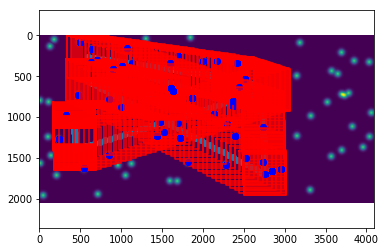

In [6]:
import scipy.misc
output_dir = "/Users/dwaithe/Documents/collaborators/WaitheD/micro_vision/tracking/sort/data/gauss_cells/"
plot(path_coord_x,path_coord_y,'o')
c = 0
f = open(output_dir+"det.txt",'w')
zplast = 0
for xp0,yp0,zp0 in zip(path_coord_x,path_coord_y,path_coord_z):
    zp0 = round(zp0,0)
    xp0 = round(xp0,0)
    yp0 = round(yp0,0)
    
    n = str(c)
    plot([xp0-256,xp0+256,xp0+256,xp0-256,xp0-256],[yp0-256,yp0-256,yp0+256,yp0+256,yp0-256],'r-')
    out_img = playground[int(yp0-256):int(yp0+256),int(xp0-256):int(xp0+256),int(zp0)]
    scipy.misc.imsave(output_dir+'outfile'+n.zfill(3)+'.jpg', out_img)
    c+=1
    
    zplast = zp0
    for [y,x,z] in coords:
        if x > xp0-256 and x < xp0+256 and y > yp0-256 and y < yp0+256 and z > zp0-256 and z < zp0+256:
            plot(x,y,'bo')
            
           
            varx = int(100.0 + np.round((np.random.random()-0.5)*100.0,0))
            vary = int(100.0 + np.round((np.random.random()-0.5)*100.0,0))
            xpos1 = (x - (xp0-256)-varx//2)+ np.round((np.random.random()-0.5)*50.0,0)
            ypos1 = (y - (yp0-256)-vary//2)+ np.round((np.random.random()-0.5)*50.0,0)
            out_str = str(c)+",-1,"+str(xpos1)+","+str(ypos1)+","+str(varx)+","+str(vary)
            out_str += ",0.99999,-1,-1,-1,"+str(xp0)+","+str(yp0)+","+str(zp0)+"\n"
            f.write(out_str)
            print(out_str)
imshow(np.max(playground[:,:,:],2))
f.close();
plt.axis('equal')

In [7]:
path

array([[1294, 2090,   16],
       [1035, 3174,    3],
       [1633,  948,   11],
       [1485, 2985,   11],
       [1296,  948,   19],
       [ 669, 2408,    6],
       [ 721,  257,   15],
       [1767, 1590,   22],
       [1580,  956,    3]])

## Define area to search

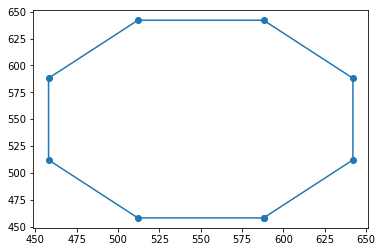

In [112]:
#define coordinates.
#points to search.
coords = []
#588,458
#512,458
#458,512
#458,588
#512,642
#588,642
#642,588
#642,512
coords.append([588, 458, 1.0])
coords.append([512, 458, 0.2])
coords.append([458, 512, 0.6])
coords.append([458, 588, 0.2])
coords.append([512, 642, 0.2])
coords.append([588, 642, 1.0])
coords.append([642, 588, 1.0])
coords.append([642, 512, 1.0])
coords.append([588, 458, 1.0])


np_coords = np.array(coords)
plot(np_coords[:,0],np_coords[:,1],'o-')
#xlim(-0.1,1.1)
#ylim(-0.1,1.1)

In [113]:
# Matplotlib mplPath
import time
import matplotlib.path as mpltPath

size_of_region =10
xmin = np.min(np_coords[:,0])
xmax = np.max(np_coords[:,0])
ymin = np.min(np_coords[:,1])
ymax = np.max(np_coords[:,1])


x,y = np.meshgrid(np.arange(xmin,xmax,size_of_region),np.arange(xmin,xmax,size_of_region))


path = mpltPath.Path(np_coords[:,0:2])
points = np.array([x.reshape(-1),y.reshape(-1)]).T
inside2 = path.contains_points(points).reshape(x.shape)
f = scipy.interpolate.griddata(np_coords[:,0:2], np_coords[:,2],np.array([x[inside2].reshape(-1), y[inside2].reshape(-1)]).T,method='linear')

f




array([0.28711755, 0.30885668, 0.33059581, 0.36842105, 0.47368421,
       0.57894737, 0.68421053, 0.78947368, 0.89473684, 0.36119163,
       0.38293076, 0.40466989, 0.42640902, 0.44814815, 0.46988728,
       0.49162641, 0.57894737, 0.68421053, 0.78947368, 0.89473684,
       0.4352657 , 0.45700483, 0.47874396, 0.50048309, 0.52222222,
       0.54396135, 0.56570048, 0.58743961, 0.60917874, 0.63091787,
       0.68421053, 0.78947368, 0.89473684, 0.50933977, 0.5310789 ,
       0.55281804, 0.57455717, 0.5962963 , 0.61803543, 0.63977456,
       0.66151369, 0.68325282, 0.70499195, 0.72673108, 0.74847021,
       0.77020934, 0.79194847, 0.89473684, 0.58341385, 0.60515298,
       0.62689211, 0.64863124, 0.67037037, 0.6921095 , 0.71384863,
       0.73558776, 0.75732689, 0.77906602, 0.80080515, 0.82254428,
       0.84428341, 0.86602254, 0.88776167, 0.90950081, 0.93123994,
       0.59016018, 0.61189931, 0.63363844, 0.65537757, 0.6771167 ,
       0.69885584, 0.72059497, 0.7423341 , 0.76407323, 0.78581

In [102]:
f.shape

(294,)

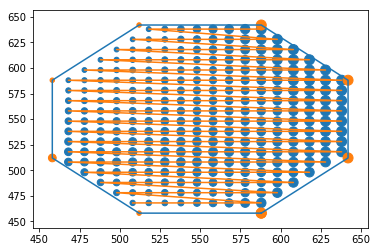

In [114]:
plot(np_coords[:,0],np_coords[:,1])
scatter(x[inside2].reshape(-1),y[inside2].reshape(-1),s=(f.reshape(-1))*100)
plot(x[inside2].reshape(-1),y[inside2].reshape(-1),'-')
scatter(np_coords[:,0],np_coords[:,1],s=np_coords[:,2]*100)

#xlim(-0.1,1.1)
#ylim(-0.1,1.1)

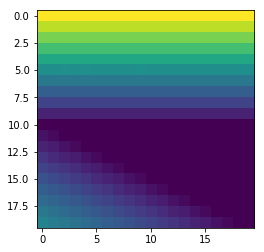

In [33]:
imshow(f.reshape(20,20))